In [5]:
from lazer import LazerDesign
from svgpathtools import parse_path
from math import pi, sin
from IPython.display import SVG, display

In [6]:
class Hologram(LazerDesign):
    def __init__(self, scale, cut_width=.5, width=100, height=100, angle_range=pi/2):
        super().__init__(cut_width, width, height)

        self.scale = scale
        self.angle_range = angle_range

        self.start_angle = pi/2 + self.angle_range/2
        self.stop_angle  = pi/2 - self.angle_range/2

        self.centerx     = width/2 
        self.centery     = -100 * sin(self.start_angle)

    def draw_point(self, x, y, depth=100):
        # hologram relative to "helper" sketch if it was done by hand
        self.arc(
            self.centerx + x * self.scale, 
            self.centery + y * self.scale, 
            depth, 
            self.start_angle, self.stop_angle, 
            "engrave", trim_outside=True
        )

In [7]:
d_string = "M 10.499686,177.03840 L 31.174931,178.56990 C 52.615925,154.32116 61.039171,82.595924 187.38789,96.634671 C 182.79339,403.95560 48.021426,436.37234 56.444675,499.41907 C 59.507674,535.15406 87.840417,557.10556 118.47041,558.38181 C 215.21014,555.06356 210.87089,424.63084 240.99038,95.868921 L 365.80760,95.868921 C 359.17110,211.75239 341.04836,327.63586 339.00636,441.22208 C 340.53786,516.77606 386.48285,557.10556 446.97708,557.61606 C 546.52456,560.93431 577.92030,444.79558 577.92030,395.27709 L 556.47931,395.27710 C 554.43731,436.11709 534.78306,465.47083 492.92207,467.25758 C 378.82535,468.78908 441.61683,266.63113 442.38258,97.400421 L 577.92030,98.166171 L 577.15455,11.636437 C 13.807491,8.9075799 85.312284,-2.1366151 10.499686,177.03840 z"
path = parse_path(d_string)

bbox_w = 570
bbow_h = 570

def normalize(point, bbox_w, bbox_h):
    return [
        ((point.real / bbox_w) - .5) * 2,
        ((point.imag / bbox_h) - .5) * 2
    ]

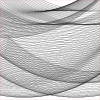

In [10]:
hologram = Hologram(scale=45, cut_width=.1)

# draw hologram
precision = 300
for index in range(precision):
    t = index / precision
    point = path.point(t)
    hologram.draw_point(*normalize(point, bbox_w, bbow_h), 125)

# draw cutout
hologram.rect(0, 0, hologram.width, hologram.height)

# save
file = "./designs/hologram.svg"
hologram.save(file)
display(SVG(filename=file))